<a href="https://colab.research.google.com/github/bgalerne/IoT_mathematics/blob/master/Lab4_2D_function_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization of a quadratic function:

**Convention:** All defined functions $f:\mathbb{R}^2\to \mathbb{R}$ must allow to be applied to a list of points of size $2\times \mathrm{Nbpoints}$ (with a 2D-array format).

Below is a quadratic function on $[-3,3]\times[-3,3]$:
$$
f(x_1,x_2) = x_1^2 + 2 x_2^2 + x_1x_2 + x_1 - 3x_2 + 1.
$$


## Define function:

In [24]:
def f(x):
  z = x[0,:]**2 + 2* x[1,:]**2 + x[0,:]*x[1,:] + x[0,:] - 3*x[1,:] + 1
  return(z)


This convention is needed to deal with any sequence of points... But has drawbacks. 


**Question:** What has to be done to evaluate $f$ at a single point $x$?
Write an example code below.



In [25]:
# evaluate f at a single point:

# TODO

## Define domain, associated grid, and evaluate function on the grid:

In [27]:
x1 = np.linspace(-3,3,200)
x2 = np.linspace(-3,3,200)

X1, X2 = np.meshgrid(x1,x2)
Xlist = np.vstack((X1.ravel(), X2.ravel()))
print(Xlist.shape)
Z = f(Xlist)
Z = np.reshape(Z, X1.shape)
print(Z.shape)

(2, 40000)
(200, 200)


## Surface plot

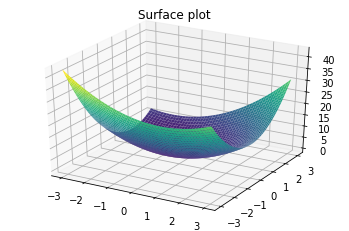

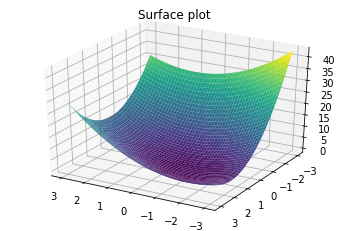

In [21]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

# same figure with different angle:
fig = plt.figure()
ax = plt.axes(projection='3d')
angle = 120
ax.view_init(30,angle)
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

## Level line plot:


Text(0.5, 1.0, 'Simplest default with labels')

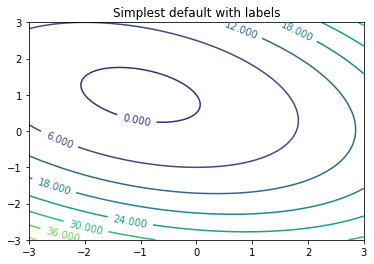

In [22]:
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

##Level line plot with more levels:

Text(0.5, 1.0, 'Simplest default with labels')

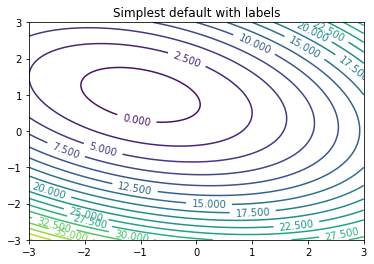

In [23]:
fig, ax = plt.subplots()
Nlevels = 20
CS = ax.contour(X1, X2, Z, Nlevels)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

# Other functions:

**Exercise:**

1. For each of the two functions below, create one surface plot and one level line plot with adapted parameters (angle and number of level lines):

- Rosenbrock's function on $[-3,3]\times [-1,4]$:
$$
f(x_1,x_2) = 100 (x_2-x_1^2)^2 + (1-x_1)^2.
$$

- Himmelblau's function on $[-5,5]\times[-5,5]$:
$$
f(x_1,x_2) = (x_1^2+x_2-11)^2+(x_1+x_2^2-7)^2.
$$

2. For each of the three functions, discuss the convexity of the function.

# Visualization of a tangent plane:

We consider again the quadratic function on $[-3,3]\times[-3,3]$:

$$
f(x_1,x_2) = x_1^2 + 2 x_2^2 + x_1x_2 + x_1 - 3x_2 + 1.
$$

1. Give the symmetric matrix $A$, the vector $b$ and the constant $c$ for which
$$
f(x) = x_1^2 + 2 x_2^2 + x_1x_2 + x_1 - 3x_2 + 1 
= \frac{1}{2} \langle A x, x \rangle - \langle b, x \rangle + c.
$$

2. Compute directly the gradient $\nabla f (x)$ and check that $\nabla f(x) = A x - b$.

3. Define a function ```gradf(x)``` that given a sequence of points $(x^{(1)}, x^{(2)}, \dots, x^{(m)})$ computes the $2\times m$ matrix 
$(\nabla f(x^{(1)}), \nabla f(x^{(2)}), \dots, \nabla f(x^{(m)}))$.

4. The graph of the tangent plan at a point $y$ is:
$$
h_y(x) = f(y) + \langle \nabla f(y), x-y\rangle.
$$
Define a function ```tangent_plane(f, y, x)``` that applies the function $h_y$ above to the list of points contained in $x$.

5. For different values of $y$ visualize simultaneously the surface plot of $f$ and the tangent plane at point $y$. 

